In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Face Mask Detection.zip to Face Mask Detection.zip


In [3]:
import zipfile
import os

# Path to your uploaded zip file (adjust this if necessary)
zip_file_path = '/content/Face Mask Detection.zip'  # Replace with your actual file name

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/face_mask_data')

# Check if the data is unzipped successfully
os.listdir('/content/face_mask_data')

dataset_path = '/content/face_mask_data'  # Adjust this path as needed

In [4]:
# Step 3: Image Data Generator with augmentation (for training the model)
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,       # Random rotation
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    brightness_range=[0.8, 1.2]  # Adjust brightness
)

In [5]:
# Step 4: Load the dataset from the directory (use the whole dataset)
train_data = image_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 7553 images belonging to 2 classes.


In [6]:
# Step 5: Build the CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 7: Train the model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // 32,
    epochs=10
)

# Step 8: Evaluate the model on the whole training data
test_loss, test_acc = model.evaluate(train_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 52/236 ━━━━━━━━━━━━━━━━━━━━ 1:24 459ms/step - accuracy: 0.5854 - loss: 0.8517

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 87/236 ━━━━━━━━━━━━━━━━━━━━ 1:09 465ms/step - accuracy: 0.6256 - loss: 0.7576

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 121s 478ms/step - accuracy: 0.7063 - loss: 0.6077
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.7812 - loss: 0.4568   
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


155/236 ━━━━━━━━━━━━━━━━━━━━ 37s 468ms/step - accuracy: 0.8295 - loss: 0.4021

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


230/236 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - accuracy: 0.8307 - loss: 0.3993

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 134s 472ms/step - accuracy: 0.8306 - loss: 0.3992
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.7812 - loss: 0.4496   
Epoch 5/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 77/236 ━━━━━━━━━━━━━━━━━━━━ 1:16 478ms/step - accuracy: 0.8183 - loss: 0.4198

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


225/236 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.8151 - loss: 0.4187

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 111s 469ms/step - accuracy: 0.8155 - loss: 0.4178
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.8125 - loss: 0.3931   
Epoch 7/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


126/236 ━━━━━━━━━━━━━━━━━━━━ 50s 462ms/step - accuracy: 0.8417 - loss: 0.3713

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


217/236 ━━━━━━━━━━━━━━━━━━━━ 8s 460ms/step - accuracy: 0.8462 - loss: 0.3649

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 110s 464ms/step - accuracy: 0.8465 - loss: 0.3645
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 77us/step - accuracy: 0.9375 - loss: 0.2240   
Epoch 9/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


 72/236 ━━━━━━━━━━━━━━━━━━━━ 1:17 471ms/step - accuracy: 0.8455 - loss: 0.3443

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


138/236 ━━━━━━━━━━━━━━━━━━━━ 44s 459ms/step - accuracy: 0.8465 - loss: 0.3438

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


236/236 ━━━━━━━━━━━━━━━━━━━━ 142s 468ms/step - accuracy: 0.8491 - loss: 0.3389
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.7812 - loss: 0.3715   


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/237 ━━━━━━━━━━━━━━━━━━━━ 1:01 448ms/step - accuracy: 0.8591 - loss: 0.3250

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


124/237 ━━━━━━━━━━━━━━━━━━━━ 50s 449ms/step - accuracy: 0.8573 - loss: 0.3266

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 ━━━━━━━━━━━━━━━━━━━━ 109s 453ms/step - accuracy: 0.8520 - loss: 0.3326


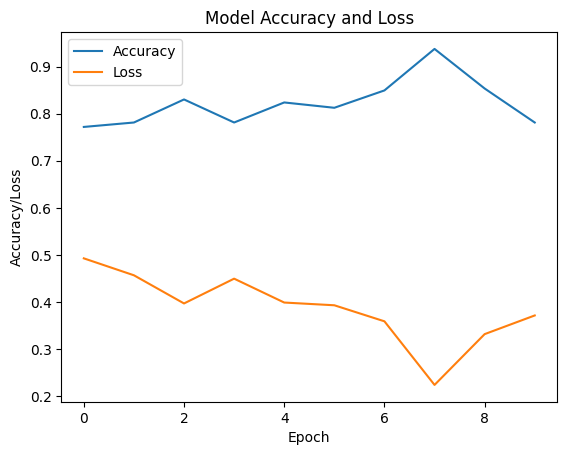

In [8]:
# Step 9: Visualize accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [9]:
# Step 10: Save the trained model
model.save('face_mask_detection_model.h5')

In [17]:
# Step 11: Test the model on an uploaded image (Add your own image path)
test_image_path = '/content/No mask3.png'  # Replace with the actual path to your test image

# Read and preprocess the image
test_image = cv2.imread(test_image_path)
test_image = cv2.resize(test_image, (224, 224))  # Resize the image to 224x224
test_image = np.expand_dims(test_image, axis=0)  # Expand dimensions to match model input
test_image = test_image / 255.0  # Rescale pixel values to [0, 1]

# Step 12: Predict the mask status
prediction = model.predict(test_image)

# Step 13: Print raw prediction value
print("Prediction Probability: ", prediction[0][0])  # Print the raw prediction value

# Step 14: Adjust threshold (if necessary)
threshold = 0.5  # You can adjust this threshold value if needed
if prediction[0][0] > threshold:
    print("Prediction: Mask")
else:
    print("Prediction: No Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction Probability:  0.07764108
Prediction: No Mask


In [18]:
from sklearn.metrics import classification_report
import shutil

# Step 15: Classification Report (Precision, Recall, F1-score, and Macro F1-score)

# To generate a classification report, we need true labels and predicted labels for the test set.
# Since the original code only loaded the entire dataset as training data,
# we will split the dataset into training and testing sets here.

# Define train and test directory paths
train_dir = '/content/face_mask_data/train'
test_dir = '/content/face_mask_data/test'

# Remove directories if they exist to avoid errors
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)


# First, get the list of image paths and their corresponding labels, only including files within class directories
image_paths = []
labels = []
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path): # Check if it's a directory (the class folder)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path): # Only include files
                image_paths.append(image_path)
                labels.append(class_name)

# Create a pandas DataFrame
df = pd.DataFrame({'path': image_paths, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_name in df['label'].unique(): # Create class directories based on unique labels in the dataframe
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)


# Move images to the new directories
for index, row in train_df.iterrows():
    class_name = row['label']
    image_name = os.path.basename(row['path'])
    shutil.copy(row['path'], os.path.join(train_dir, class_name, image_name))

for index, row in test_df.iterrows():
    class_name = row['label']
    image_name = os.path.basename(row['path'])
    shutil.copy(row['path'], os.path.join(test_dir, class_name, image_name))


# Image Data Generator for test set (no augmentation)
test_image_gen = ImageDataGenerator(rescale=1./255)

# Load the test dataset from the directory
test_data = test_image_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for classification report to match predictions with true labels
)

# Predict on the test data
y_pred_prob = model.predict(test_data)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels
y_true = test_data.classes

# Print classification report
print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

Found 1511 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step
              precision    recall  f1-score   support

   with_mask       0.83      0.98      0.90       745
without_mask       0.98      0.80      0.88       766

    accuracy                           0.89      1511
   macro avg       0.90      0.89      0.89      1511
weighted avg       0.90      0.89      0.89      1511

